In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('mushrooms.csv')

# Check basic info
print(df.info())
print(df.head())

# Check class distribution
print(df['class'].value_counts())

# Split into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split into training and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize models
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
nb = GaussianNB()

# Train models
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)


GaussianNB()

In [7]:
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score, confusion_matrix)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, pos_label='p'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, pos_label='p'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='p'):.4f}")
    
    cm = confusion_matrix(y_test, y_pred, labels=['e', 'p'])
    print("Confusion Matrix:")
    print(cm)
    
    return cm

print("Decision Tree Evaluation:")
dt_cm = evaluate_model(dt, X_test, y_test)

print("\nRandom Forest Evaluation:")
rf_cm = evaluate_model(rf, X_test, y_test)

print("\nNaïve Bayes Evaluation:")
nb_cm = evaluate_model(nb, X_test, y_test)

Decision Tree Evaluation:
Accuracy: 0.9988
Precision: 1.0000
Recall: 0.9974
F1 Score: 0.9987
Confusion Matrix:
[[842   0]
 [  2 781]]

Random Forest Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[842   0]
 [  0 783]]

Naïve Bayes Evaluation:
Accuracy: 0.9618
Precision: 0.9287
Recall: 0.9974
F1 Score: 0.9618
Confusion Matrix:
[[782  60]
 [  2 781]]


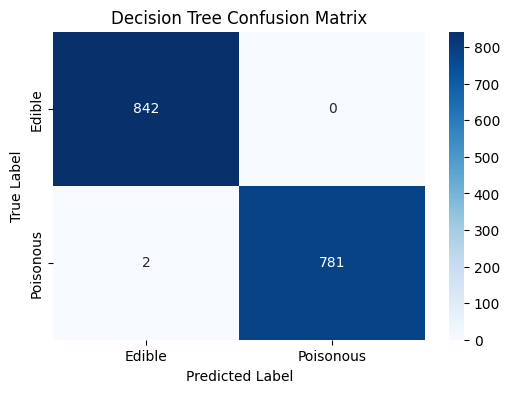

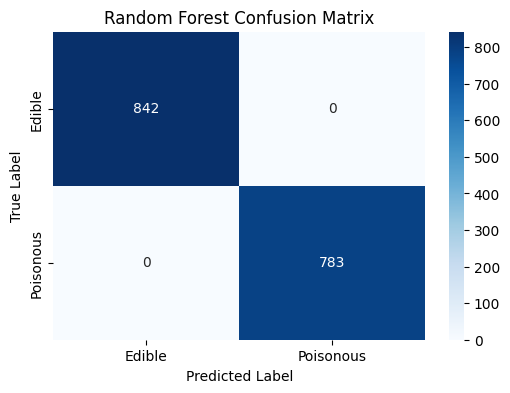

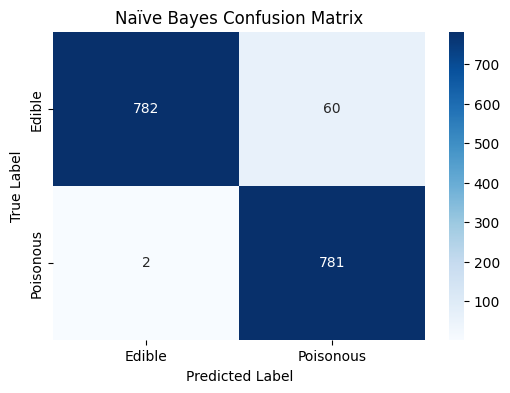

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Edible', 'Poisonous'],
                yticklabels=['Edible', 'Poisonous'])
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(dt_cm, "Decision Tree Confusion Matrix")
plot_confusion_matrix(rf_cm, "Random Forest Confusion Matrix")
plot_confusion_matrix(nb_cm, "Naïve Bayes Confusion Matrix")